In [80]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

<AxesSubplot:xlabel='X', ylabel='Y'>

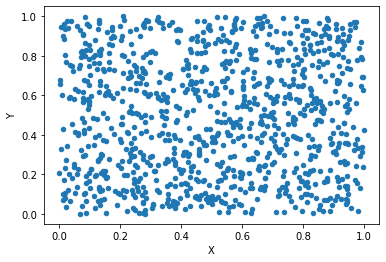

In [87]:
x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)
df_xy= pd.DataFrame(columns=["X","Y"])
df_xy.X= X
df_xy.Y= Y
df_xy.plot(x="X",y="Y", kind="scatter")# (in kind = by using capslock K and without capslock k o/p impacts)

In [88]:
x = np.random.uniform(0,1,1000)
x

array([0.09122335, 0.50481921, 0.26380129, 0.18192156, 0.76188868,
       0.14852693, 0.97807811, 0.37554481, 0.79902939, 0.99153039,
       0.50741279, 0.16323412, 0.9233974 , 0.7680013 , 0.82911227,
       0.37849269, 0.50809004, 0.18918829, 0.03501329, 0.87731552,
       0.80926334, 0.89405479, 0.91946915, 0.20663215, 0.85878487,
       0.58025136, 0.02621807, 0.71387934, 0.24739018, 0.42191746,
       0.87152876, 0.77619492, 0.22088333, 0.79905907, 0.66723588,
       0.65888218, 0.20121966, 0.68058142, 0.93734878, 0.59688429,
       0.98952824, 0.16505201, 0.99133274, 0.07079701, 0.10578555,
       0.68313449, 0.08006226, 0.92374699, 0.86213632, 0.09958977,
       0.99732703, 0.62278337, 0.57158933, 0.22357741, 0.49706352,
       0.41763413, 0.9701953 , 0.83798953, 0.01095274, 0.30085879,
       0.90070397, 0.60608643, 0.76241137, 0.0028504 , 0.1172054 ,
       0.32328899, 0.82611332, 0.65595968, 0.22848898, 0.81243059,
       0.5662372 , 0.59011566, 0.57600068, 0.66219045, 0.83314

<AxesSubplot:xlabel='X', ylabel='Y'>

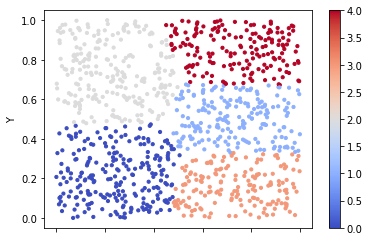

In [89]:
model1 = KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",c=model1.labels_, kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [37]:
Univ = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Day 18 - kmeans , DB scan/Universities.csv")

In [38]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [40]:
# Normalization function  ////////// its like " z-test"
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame(considering the numerical part of the data)
df_norm = norm_func(Univ.iloc[:,1:])

In [41]:
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


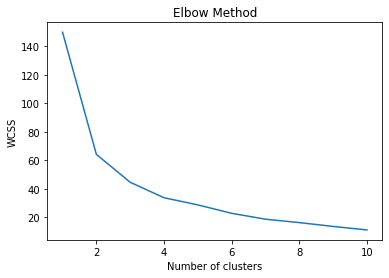

In [42]:
# ELBOW CURVE
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
model = KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 2, 3, 0, 3, 0, 0, 3, 0, 2, 0, 3, 3, 1, 0, 1, 0, 1, 3, 3, 3, 3,
       3, 1, 0])

In [96]:
md = pd.Series(model.labels_)
Univ['clust'] = md
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [97]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000
3,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
